Tasks

Importing the Relevant Libraries

Loading the Data

Visualizing the Data Frame

Exploring the Data

Cleaning the data

Replace by dummy variable if any

Find correlation of all the variables with the target variable

Obtain correlation of all the varibles among themselves to check for multicollinearity

Identify appropriate predictor variables required to estimate the target variable

Split the data into train and test dataset.

Create and fit a linear regression model

Make predictions using the regression model.

Obtain MSE, Rsquared and adjusted rquared values.

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import scale

from sklearn.metrics import mean_squared_error as mse, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
plt.style.use('seaborn-white')

In [107]:
df= pd.read_csv("carprice.csv") #Load the dataset

In [108]:
df.head() #Visualize the dataframe

,car_ID,symboling,fueltype,aspiration,wheelbase,carlength,curbweight,enginesize,boreratio,horsepower,enginelocation,stroke,price
0,1,3,gas,std,88.6,168.8,2548,130,3.47,111,front,2.68,13495.0
1,2,3,gas,std,88.6,168.8,2548,130,3.47,111,front,2.68,16500.0
2,3,1,gas,std,94.5,171.2,2823,152,2.68,154,front,3.47,16500.0
3,4,2,gas,std,99.8,176.6,2337,109,3.19,102,front,3.40,13950.0
4,5,2,gas,std,99.4,176.6,2824,136,3.19,115,front,3.40,17450.0


In [109]:
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'wheelbase',
       'carlength', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'enginelocation', 'stroke', 'price'],
      dtype='object')

In [110]:
#to ascertain if the dataframe has any null value
df=df.drop("car_ID", axis=1)

In [111]:
df.describe()

,symboling,wheelbase,carlength,curbweight,enginesize,boreratio,horsepower,stroke,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,2555.565854,126.907317,3.329756,104.117073,3.255415,13276.710571
std,1.245307,6.021776,12.337289,520.680204,41.642693,0.270844,39.544167,0.313597,7988.852332
min,-2.000000,86.600000,141.100000,1488.000000,61.000000,2.540000,48.000000,2.070000,5118.000000
25%,0.000000,94.500000,166.300000,2145.000000,97.000000,3.150000,70.000000,3.110000,7788.000000
50%,1.000000,97.000000,173.200000,2414.000000,120.000000,3.310000,95.000000,3.290000,10295.000000
75%,2.000000,102.400000,183.100000,2935.000000,141.000000,3.580000,116.000000,3.410000,16503.000000
max,3.000000,120.900000,208.100000,4066.000000,326.000000,3.940000,288.000000,4.170000,45400.000000


In [112]:
#Lets find out the columns having categorical data
df.dtypes

symboling           int64
fueltype           object
aspiration         object
wheelbase         float64
carlength         float64
curbweight          int64
enginesize          int64
boreratio         float64
horsepower          int64
enginelocation     object
stroke            float64
price             float64
dtype: object

<AxesSubplot: xlabel='aspiration', ylabel='price'>

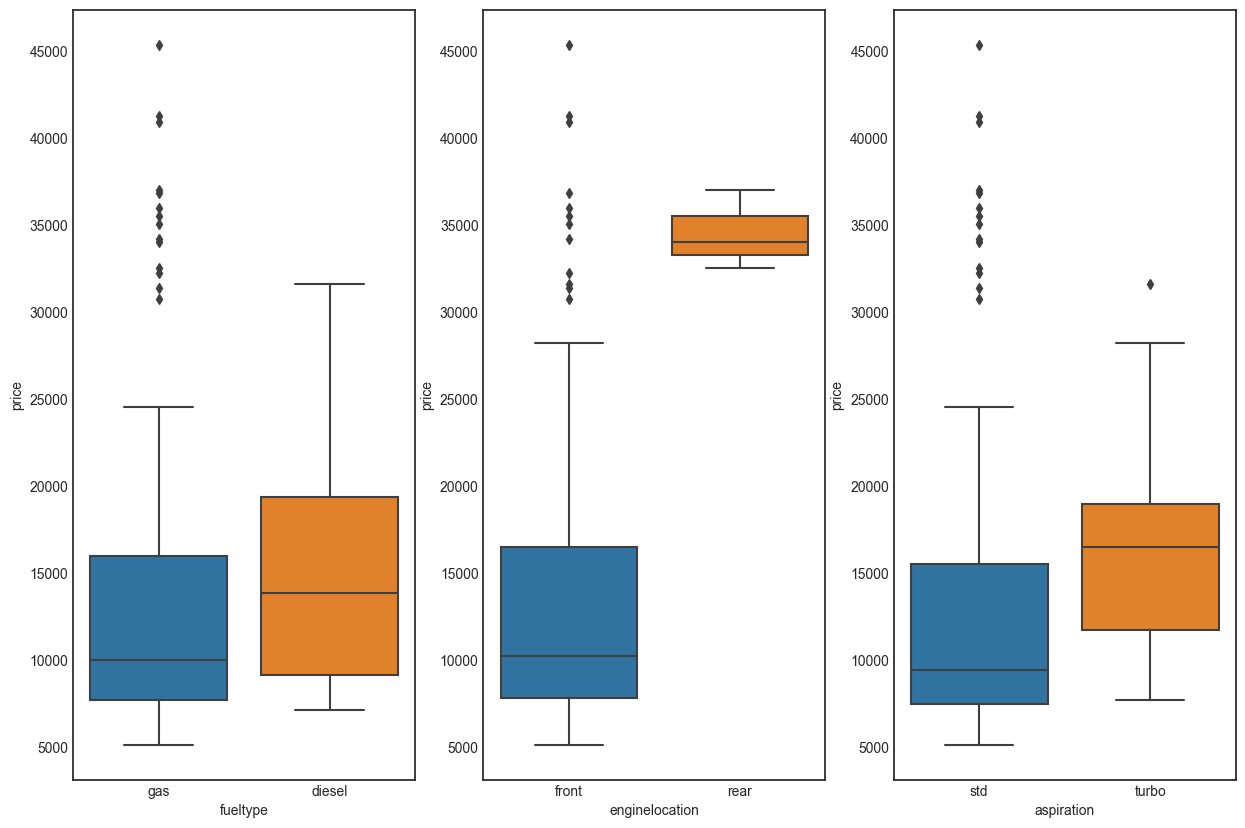

In [113]:
#Visualization using boxplot
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
sns.boxplot(df, x="fueltype",y="price")
plt.subplot(1,3,2)
sns.boxplot(df, x="enginelocation",y="price")
plt.subplot(1,3,3)
sns.boxplot(df, x="aspiration",y="price")

In [114]:
#Now we identify the columns in dataframe which has categorical variables.
#Datatype of all these columns will be object
#these column names will be stored in lst1
lst1=[]
for col in df.columns:
    if df[col].dtype==object:
        lst1.append(col)
print(lst1)

['fueltype', 'aspiration', 'enginelocation']


## Note

We observe that the variables fueltype, aspiration, enginelocation are categorical. Hence we shall replace the categorical variables by numbers

In [115]:
#Options in fueltype column
df["fueltype"].unique()

array(['gas', 'diesel'], dtype=object)

In [116]:
#Options in aspiration column
df["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

In [117]:
#Options in enginelocation column
df["enginelocation"].unique()

array(['front', 'rear'], dtype=object)

In [118]:
#Lets write a function to convert the categorical variable to number using
#the concept of one hot encoding
#Here we will use get_dummies function of the dataframe

def dummy(col,df):
    dummy_col= pd.get_dummies(df, columns=[col], drop_first=True)
    return dummy_col

In [119]:
#Now we iterate over the entire list of columns having categorical variables
#We will call the dummy function created above. 
#Hence each categorical column will be converted to numerical column
for col in lst1:
    df= dummy(col,df)   

In [140]:
#Verify if all the categorical variables have been dealt with.
df.head()

,symboling,wheelbase,carlength,curbweight,enginesize,boreratio,horsepower,stroke,price,fueltype_gas,aspiration_turbo,enginelocation_rear
0,3,88.6,168.8,2548,130,3.47,111,2.68,13495.0,1,0,0
1,3,88.6,168.8,2548,130,3.47,111,2.68,16500.0,1,0,0
2,1,94.5,171.2,2823,152,2.68,154,3.47,16500.0,1,0,0
3,2,99.8,176.6,2337,109,3.19,102,3.40,13950.0,1,0,0
4,2,99.4,176.6,2824,136,3.19,115,3.40,17450.0,1,0,0


In [141]:
df.columns

Index(['symboling', 'wheelbase', 'carlength', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'stroke', 'price', 'fueltype_gas',
       'aspiration_turbo', 'enginelocation_rear'],
      dtype='object')

## To find correlation between IV (Independent Variables) and DV(Dependent Variables) and all IVs (Multicolinearity)

Methods

1. VIF
2. Correlation matrix
3. Scatter plot

<AxesSubplot: >

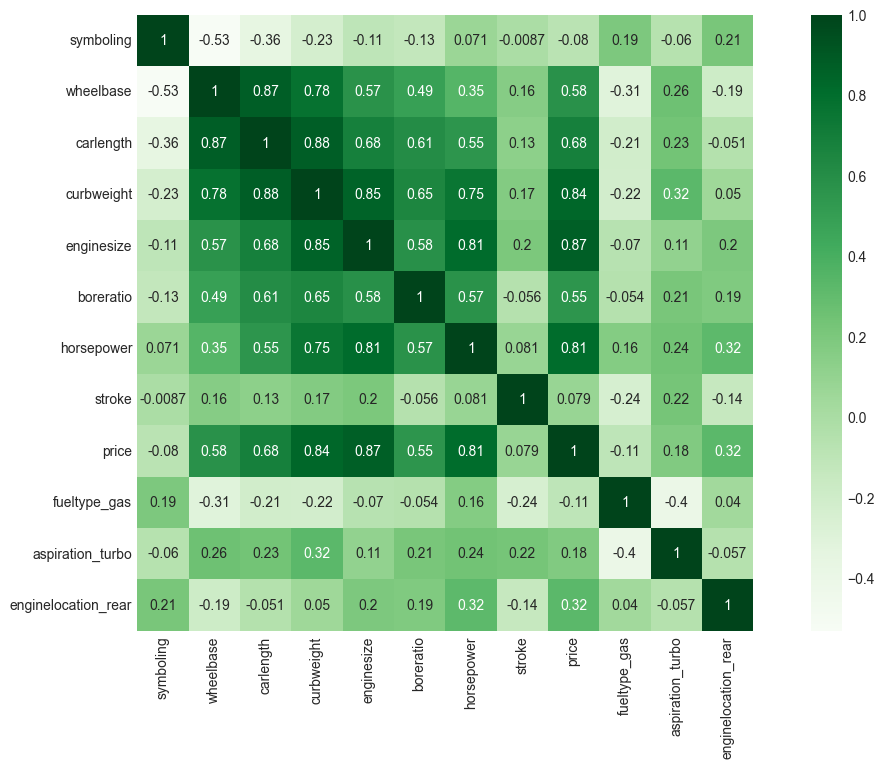

In [121]:
#We use correlation matrix to check multicollinearity
corr = df.corr()
plt.figure(figsize = (15,8)) #To set the figure size
sns.heatmap(data=corr, square=True , annot=True, cbar=True, cmap="Greens") 

<Figure size 1500x800 with 0 Axes>

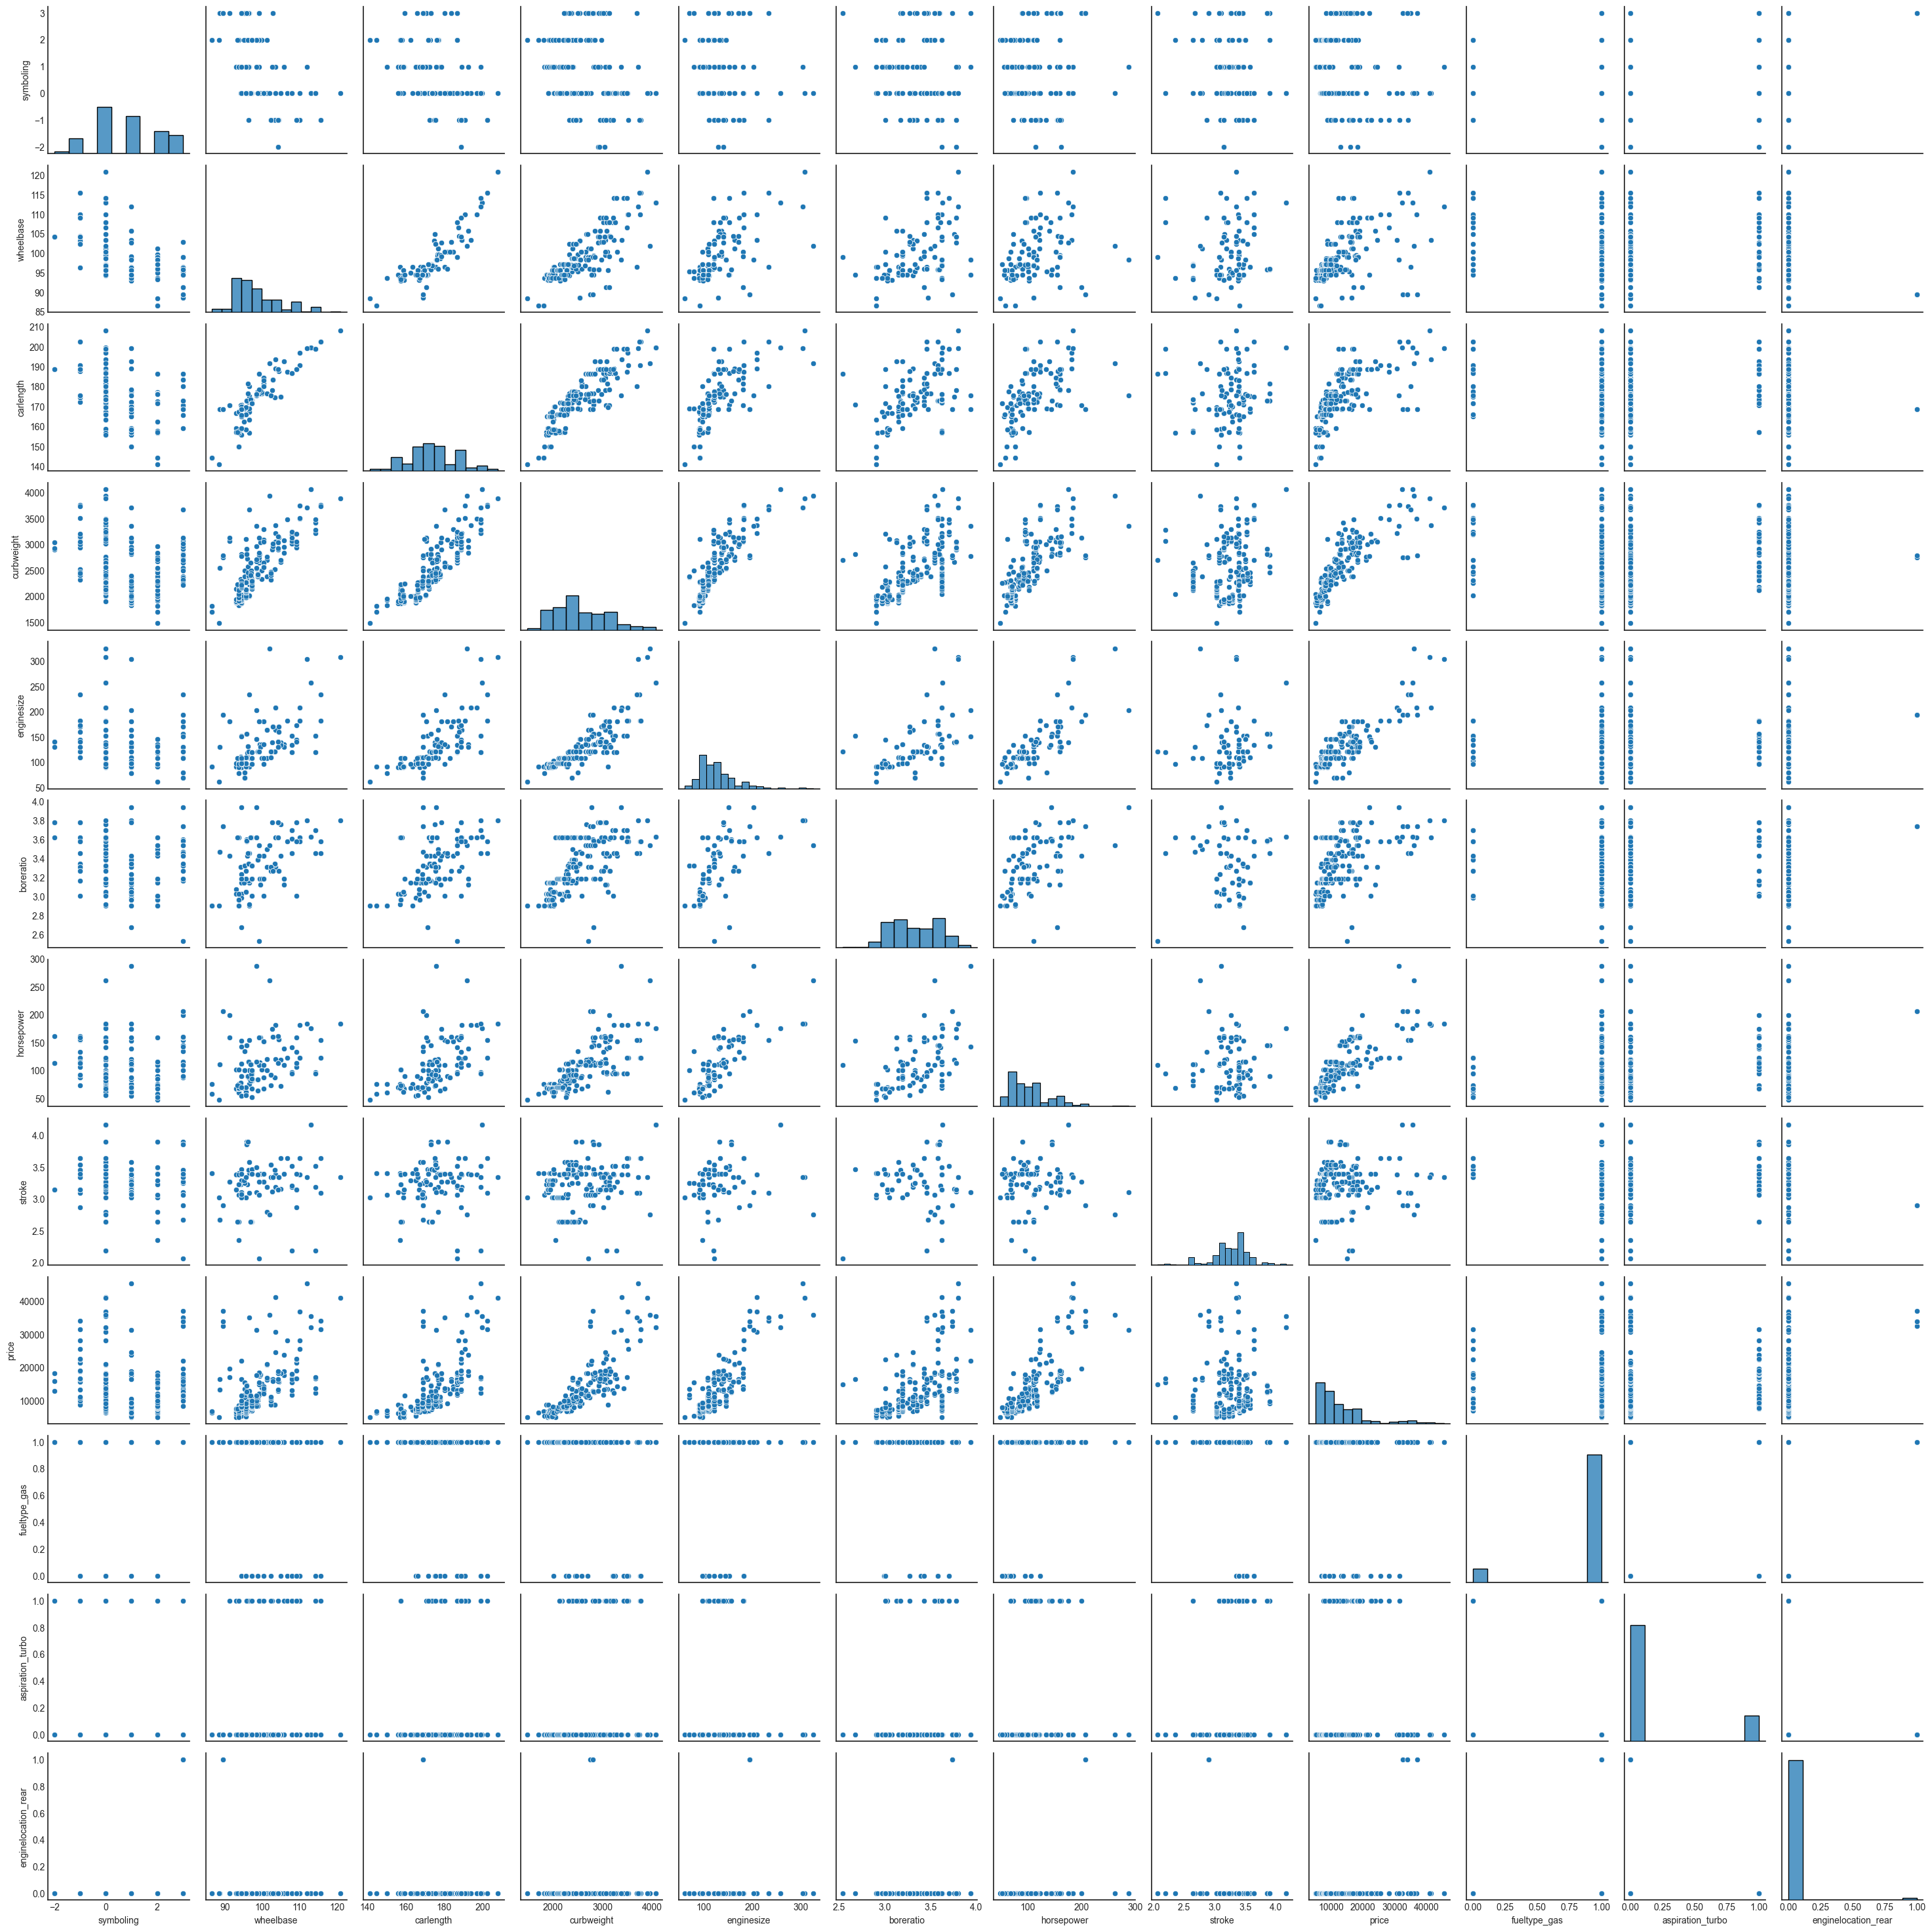

<Figure size 1500x800 with 0 Axes>

In [122]:
#Plotting scatter plot using plotly amongst the IV and DV to check for multicollinearity
sns.pairplot(df)
plt.figure(figsize = (15,8)) #To set the figure size

## Note

We notice strong correlation (greater that 0.5) between target variable "Price" and Predictor variables wheelbase, carlength, curbweight, enginesize, borerratio and horse power. So we select only these predictor variables to make prediction.

We also notice a very high collinearity of curbweight with the other predictors like wheelbase, carlength,enginesize, borerratio and horse power

In [123]:
#Let us also implement VIF to check for multicollinearity

df1= df.drop(['price'], axis=1) #forming dataframe of only independent variables

#Detecting Multiocollinearity using builtin function for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant 

"""
variance_inflation_factor expects the presence of a constant in the matrix of
explanatory variables.
One can use add_constant from statsmodels to add the required constant to the 
dataframe before passing its values to the function.
"""

df1 = add_constant(df1)
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df1.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df1.values, i)
                          for i in range(len(df1.columns))]

print(vif_data)      

                feature          VIF
0                 const  1163.294471
1             symboling     1.613605
2             wheelbase     6.959067
3             carlength     8.124357
4            curbweight    13.592476
5            enginesize     6.599023
6             boreratio     1.971286
7            horsepower     6.643302
8                stroke     1.256951
9          fueltype_gas     1.976246
10     aspiration_turbo     1.849012
11  enginelocation_rear     1.432083


## Note

Let us drop the curbweight feature as VIF also indicates strong correlation with other predictors.
Similarly let us drop carlength feature also


In [124]:
df2= df.drop(["price","curbweight","carlength" ], axis=1)

df2 = add_constant(df2)
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df2.values, i)
                          for i in range(len(df2.columns))]

print(vif_data)      

               feature         VIF
0                const  940.469546
1            symboling    1.580112
2            wheelbase    2.911674
3           enginesize    5.354289
4            boreratio    1.872523
5           horsepower    5.374978
6               stroke    1.245829
7         fueltype_gas    1.833370
8     aspiration_turbo    1.763977
9  enginelocation_rear    1.393792


## Note

Now we see that the multicollinearity has reduced

In [125]:
df.columns

Index(['symboling', 'wheelbase', 'carlength', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'stroke', 'price', 'fueltype_gas',
       'aspiration_turbo', 'enginelocation_rear'],
      dtype='object')

## MODEL1
Taking "wheelbase", "enginesize", "boreratio","horsepower" as predictors

In [126]:
#Define the independent and dependent variables

X=df[["wheelbase", "enginesize", "boreratio","horsepower"]]
y= df["price"]

In [127]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

In [128]:
model1 = LinearRegression() #Create a linear regression model
model1.fit(x_train,y_train) #Fit the data

LinearRegression()

In [129]:
#Predict the value of y based on the test data
y_prediction =  model1.predict(x_test)

In [130]:
PricePredict = pd.DataFrame({'Actual price': y_test, 'Predicted price': y_prediction}) #Create a dataframe to display actual and Predicted value
PricePredict


,Actual price,Predicted price
189,11595.000,9605.004684
39,8845.000,9952.274311
195,13415.000,16104.976741
174,10698.000,10358.495837
171,11549.000,15516.333472
161,8358.000,7462.142795
111,15580.000,13913.214599
184,7995.000,6733.601092
27,8558.000,9266.365361
7,18920.000,16292.477217


In [131]:
MSE_LS= mse(PricePredict["Actual price"], PricePredict["Predicted price"])
print(MSE_LS)

10248326.58718323


In [132]:
#Obtain the r_squared value
print("r_squared value is ", model1.score(X,y))

r_squared value is  0.8128661911967511


In [133]:
#Obtain the intercept and the coefficient
b0= model1.intercept_
b1= model1.coef_
print(b0)
print(b1)

-26235.772884582984
[  234.93901064   100.49206321 -1019.36860695    65.96880033]


In [134]:
x = sm.add_constant(X) #This is the intercept that has to be added to create the ols model

In [135]:
model_ols1 = sm.OLS(y, x) # create the model
model_ols1.fit().summary() #fit the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     217.9
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           1.04e-71
Time:                        16:53:58   Log-Likelihood:                -1960.4
No. Observations:                 205   AIC:                             3931.
Df Residuals:                     200   BIC:                             3947.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.716e+04   4963.569     -5.473      0.000    -3.7e+04   -1.74e+04
wheelbase    243.3623     52.942      4.597      0.000     138.966     347.759
enginesize    95.7123     11.689      8.188      0.000      72.663     118.762
boreratio   -984.7774   1188.756     -0.828      0.408   -3328.882    1359.327
horsepower    72.4218     11.237      6.445      0.000      50.264      94.579
==============================================================================
Omnibus:                       22.439   Durbin-Watson:                   0.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.093
Skew:                           0.567   Prob(JB):                     1.19e-09
Kurtosis:                       4.877   Cond. No.                     4.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:
#Obtain root mean square error
sm.tools.eval_measures.rmse(y_test, y_prediction, axis=0) 

3201.300764874058

## Model 2
taking "wheelbase", "enginesize", "boreratio","horsepower" and carlength as predictors

In [137]:
model2 = smf.ols('price ~ enginesize + boreratio + horsepower+wheelbase+carlength',df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     173.5
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           1.57e-70
Time:                        16:53:58   Log-Likelihood:                -1960.4
No. Observations:                 205   AIC:                             3933.
Df Residuals:                     199   BIC:                             3953.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -2.72e+04   4976.388     -5.466      0.000    -3.7e+04   -1.74e+04
enginesize    95.4835     11.740      8.133      0.000      72.332     118.635
boreratio  -1063.2091   1219.314     -0.872      0.384   -3467.642    1341.224
horsepower    71.5273     11.644      6.143      0.000      48.567      94.488
wheelbase    221.0726     90.763      2.436      0.016      42.091     400.054
carlength     15.0629     49.762      0.303      0.762     -83.065     113.191
==============================================================================
Omnibus:                       22.094   Durbin-Watson:                   0.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.447
Skew:                           0.559   Prob(JB):                     1.65e-09
Kurtosis:                       4.867   Cond. No.                     5.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model3
taking "wheelbase", "enginesize", "boreratio","horsepower" and curbweight as predictors

In [138]:
model3 = smf.ols('price ~ enginesize + boreratio + horsepower+wheelbase+curbweight',df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     178.1
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           1.93e-71
Time:                        16:53:58   Log-Likelihood:                -1958.2
No. Observations:                 205   AIC:                             3928.
Df Residuals:                     199   BIC:                             3948.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.913e+04   6252.795     -3.060      0.003   -3.15e+04   -6801.268
enginesize    84.8856     12.704      6.682      0.000      59.834     109.937
boreratio  -1398.6877   1195.569     -1.170      0.243   -3756.298     958.922
horsepower    60.8183     12.458      4.882      0.000      36.252      85.385
wheelbase    126.9175     76.682      1.655      0.099     -24.297     278.132
curbweight     2.9061      1.395      2.084      0.038       0.156       5.657
==============================================================================
Omnibus:                       24.070   Durbin-Watson:                   0.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.810
Skew:                           0.553   Prob(JB):                     9.26e-12
Kurtosis:                       5.174   Cond. No.                     6.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model4
taking "wheelbase", "enginesize", "boreratio","horsepower" and enginelocation_rear as predictors

In [139]:
df.columns

Index(['symboling', 'wheelbase', 'carlength', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'stroke', 'price', 'fueltype_gas',
       'aspiration_turbo', 'enginelocation_rear'],
      dtype='object')

In [152]:
model4 = smf.ols('price ~ enginesize + boreratio + horsepower+wheelbase+enginelocation_rear',df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           4.08e-66
Time:                        17:02:19   Log-Likelihood:                -1973.7
No. Observations:                 205   AIC:                             3957.
Df Residuals:                     200   BIC:                             3974.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -5.076e+04   4902.946    -10.354      0.000   -6.04e+04   -4.11e+04
boreratio           -1426.0132   1279.130     -1.115      0.266   -3948.326    1096.299
horsepower            124.6041      8.512     14.639      0.000     107.820     141.388
wheelbase             563.0333     53.528     10.519      0.000     457.482     668.584
enginelocation_rear  1.444e+04   2450.993      5.891      0.000    9606.641    1.93e+04
==============================================================================
Omnibus:                       67.002   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.866
Skew:                           1.302   Prob(JB):                     7.38e-51
Kurtosis:                       7.499   Cond. No.                     2.80e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model 5

taking "wheelbase", "enginesize", "boreratio","horsepower" and horsepower*enginesize, engineLocation_rear as predictors

In [148]:
model5 = smf.ols('price ~ enginesize + boreratio + horsepower+wheelbase+enginelocation_rear+horsepower*enginesize',df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           3.41e-77
Time:                        16:59:22   Log-Likelihood:                -1941.7
No. Observations:                 205   AIC:                             3897.
Df Residuals:                     198   BIC:                             3921.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -3.406e+04   4685.689     -7.269      0.000   -4.33e+04   -2.48e+04
enginesize               70.3558     23.386      3.009      0.003      24.239     116.473
boreratio             -1635.9257   1152.780     -1.419      0.157   -3909.228     637.377
horsepower               46.4773     18.428      2.522      0.012      10.137      82.818
wheelbase               376.0737     54.843      6.857      0.000     267.923     484.224
enginelocation_rear    1.313e+04   2113.344      6.212      0.000    8959.997    1.73e+04
horsepower:enginesize     0.1158      0.117      0.989      0.324      -0.115       0.347
==============================================================================
Omnibus:                       34.306   Durbin-Watson:                   0.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.900
Skew:                           0.758   Prob(JB):                     7.36e-18
Kurtosis:                       5.635   Cond. No.                     3.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model 6
taking "wheelbase", "enginesize*enginesize", "boreratio","horsepower" , engineLocation_rear as predictors


In [149]:
model6 = smf.ols('price ~ enginesize*enginesize + boreratio + horsepower+wheelbase+enginelocation_rear',df).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     214.9
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           3.59e-78
Time:                        17:01:10   Log-Likelihood:                -1942.2
No. Observations:                 205   AIC:                             3896.
Df Residuals:                     199   BIC:                             3916.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.372e+04   4672.998     -7.216      0.000   -4.29e+04   -2.45e+04
enginesize             90.8857     10.749      8.455      0.000      69.688     112.083
boreratio           -1970.8630   1101.799     -1.789      0.075   -4143.562     201.836
horsepower             61.4777     10.455      5.880      0.000      40.860      82.095
wheelbase             358.8004     51.981      6.902      0.000     256.295     461.305
enginelocation_rear  1.315e+04   2113.093      6.223      0.000    8983.839    1.73e+04
==============================================================================
Omnibus:                       32.237   Durbin-Watson:                   0.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.791
Skew:                           0.718   Prob(JB):                     1.56e-16
Kurtosis:                       5.541   Cond. No.                     4.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model7 
taking wheelbase "enginesize", "horsepower" and enginelocation_rear as predictors

In [156]:
model7 = smf.ols('price ~ wheelbase+enginesize + horsepower+enginelocation_rear',df).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     265.0
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           1.01e-78
Time:                        17:04:40   Log-Likelihood:                -1943.8
No. Observations:                 205   AIC:                             3898.
Df Residuals:                     200   BIC:                             3914.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.667e+04   4396.642     -8.341      0.000   -4.53e+04    -2.8e+04
wheelbase             328.6163     49.436      6.647      0.000     231.134     426.099
enginesize             89.7611     10.790      8.319      0.000      68.484     111.038
horsepower             56.8426     10.185      5.581      0.000      36.759      76.926
enginelocation_rear  1.261e+04   2102.597      5.996      0.000    8461.097    1.68e+04
==============================================================================
Omnibus:                       29.509   Durbin-Watson:                   0.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.003
Skew:                           0.683   Prob(JB):                     3.44e-14
Kurtosis:                       5.322   Cond. No.                     3.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Observation and conclusion


Model 7 is the best model r squared of 84.1 % and adjusted r squared of  83.8% with four predictor variables "wheelbase", "enginesize", "horsepower" and enginelocation_rear
